# CPSC 601 Connectomics Fall 2024: Exercise 1

Complete the below exercises and hand-in to the Dropbox folder by 23:59pm Friday 27th September. Please submit both a pdf format (with all your code clearly visible) and an ipynb format. 

You will not be graded on code 'quality', optimization, etc. You will be graded on: does it work properly, do you understand what it means.

You may use any code from class and refer to any outside resources (excepting AI tools), as long as you reference them appropriately. 

Interpretation is a fundamental part of analysis - nowhere should you just provide a number or distibution without commenting on what you can learn from it.

You have been given a weighted undirected network representation of the C. elegans nervous system. The nodes are neurons, and the edges correspond to synaptic connections between two neurons. Weights correspond to number of synapses, and the direction of connection is ignored. In this exercise you will explore the three central measures in network science - degree distribution, clustering, and path length - and consider their extensions to weighted networks.

## Q1: Degree, weight, and strength (15 marks)
Plot:
- (a) The degree distibution;
- (b) The edge weight distribution;
- (c) The strength distribution. 

What do you observe? Is this surprising or expected?

In [2]:
# Imports
import numpy as np
import networkx as nx
import bct
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Default matplotlib things
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [3]:
#https://www.geeksforgeeks.org/how-to-read-dictionary-from-file-in-python/
import ast
# Create our graph, load it in
G = nx.Graph()

# Load it in the python way
f = open("celegans_wu", 'r')

for line in f:
    # print(line)
    split = line.strip().split(' ', 2)
    # print(split)
    node1 = int(split[0])
    node2 = int(split[1])
    weight = ast.literal_eval(split[2])
    weight_for_graph = next(iter(weight.values()))
    # print(weight_for_graph)
    
    G.add_edge(node1, node2, weight=weight_for_graph)
    
    # break

# Alternative method
G1 = nx.read_edgelist('./celegans_wu', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

# print(G1[0])

In [4]:
# Sanity checks

# number of nodes
print(G.number_of_nodes())

# more pythonic way
print(len(G))

# number of edges
print(G.number_of_edges())

# better
print(G.size())

# how to do string formatting
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

279
279
2287
2287
G has 279 nodes and 2287 edges.


In [5]:
# Degree Information

N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)


G_array = nx.to_numpy_array(G)
bct_degrees = bct.degrees_und(G_array)

# for a directed graph, the syntax is:
# in_deg, out_deg, tot_deg = bct.degrees_dir(G_array)

bct_kmin = min(bct_degrees)
bct_kmax = max(bct_degrees)

bct_N = len(G_array)
bct_L = np.sum(G_array)/2 

print("Number of nodes: ", bct_N)
print("Number of edges: ", bct_L)
print()
print("Average degree: ", 2*bct_L/bct_N)
print("Average degree (alternate calculation)", np.mean(bct_degrees))
print()
print("Minimum degree: ", bct_kmin)
print("Maximum degree: ", bct_kmax)

Number of nodes:  279
Number of edges:  7281.0

Average degree:  52.193548387096776
Average degree (alternate calculation) 16.39426523297491

Minimum degree:  2.0
Maximum degree:  93.0


## Degree Distribution Plots ##

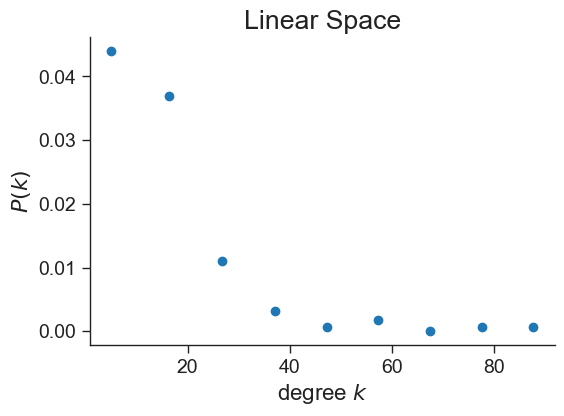

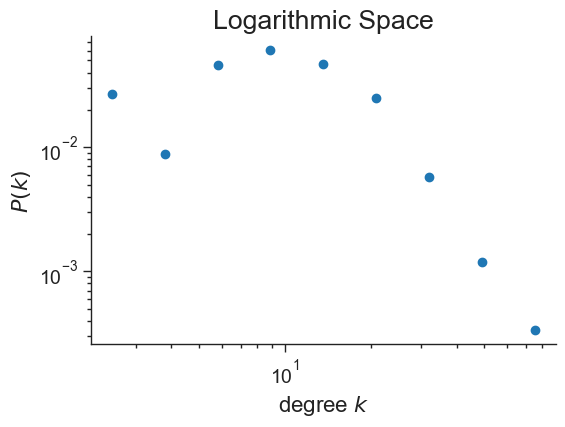

In [23]:

# First, let's do it linearly 
kmin = min(degrees)
kmax = max(degrees)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()

# LOGARITHMICALLY

# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")
# Show the plot
plt.show()



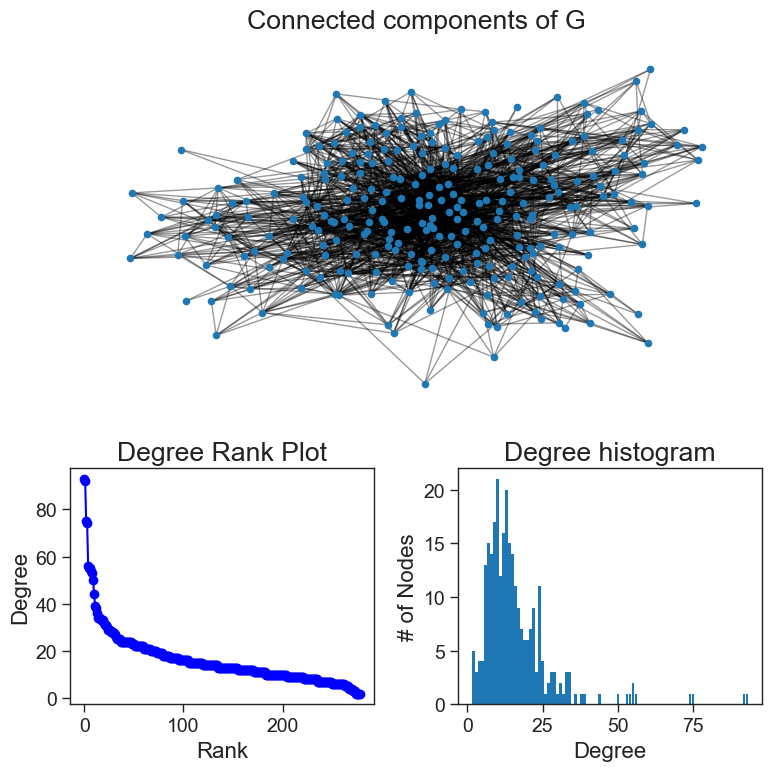

In [8]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html
# Alternative method
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

## Edge Weight Distribution Plots ##

TODO: THIS NEEDS WORK

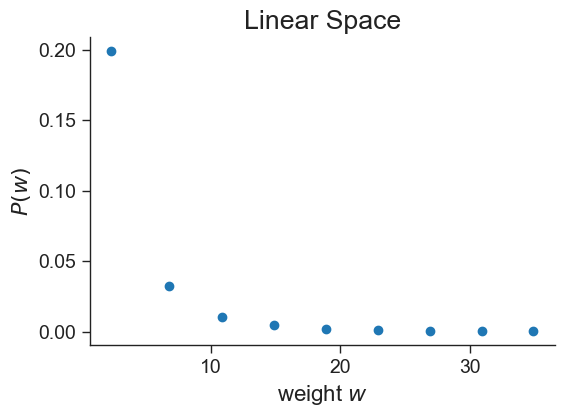

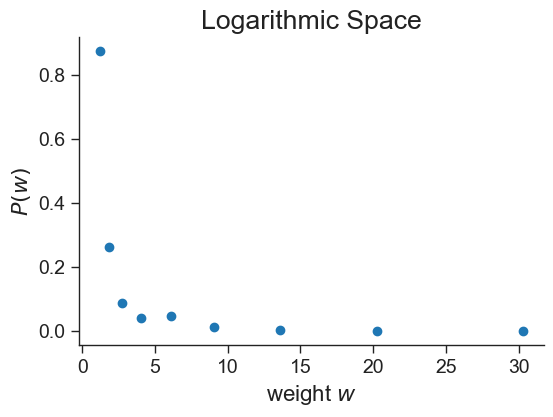

In [24]:
# Probability that a randomly chosen link has weight w
# Let's use a histogram and a regular plot

# First, let's do it linearly 
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
# print(edge_weights)

kmin = min(edge_weights)
kmax = max(edge_weights)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(edge_weights, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"weight $w$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()


bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(edge_weights, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"weight $w$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")

# Show the plot
plt.show()



## Strength Distribution Plots ##

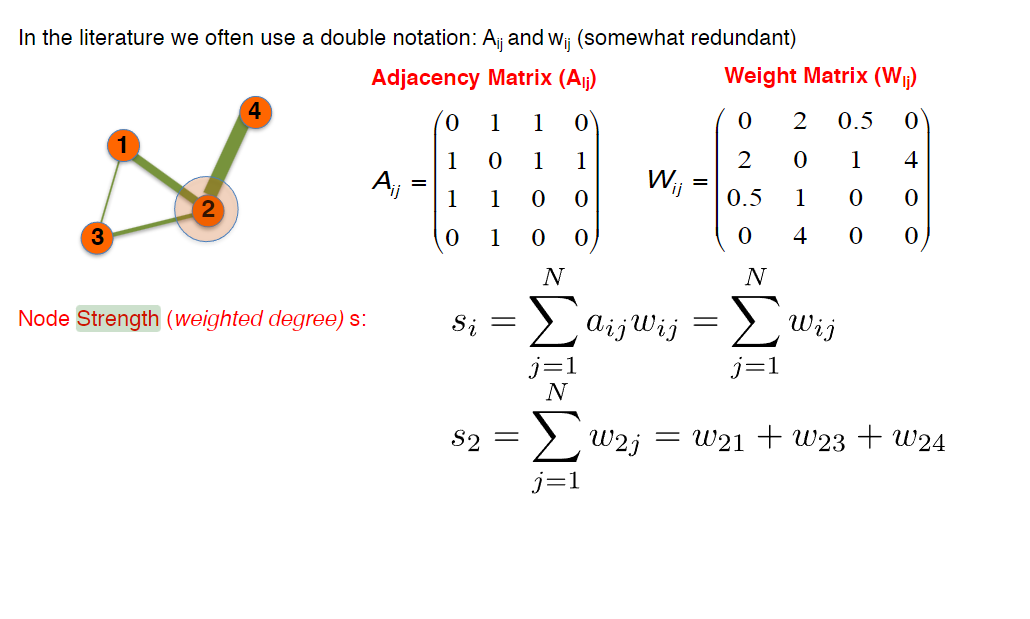

Not entirely sure what this entails

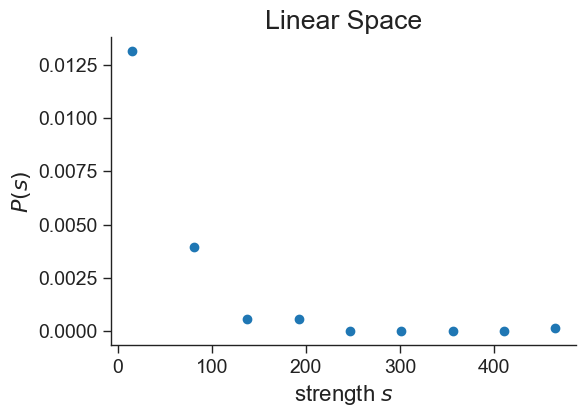

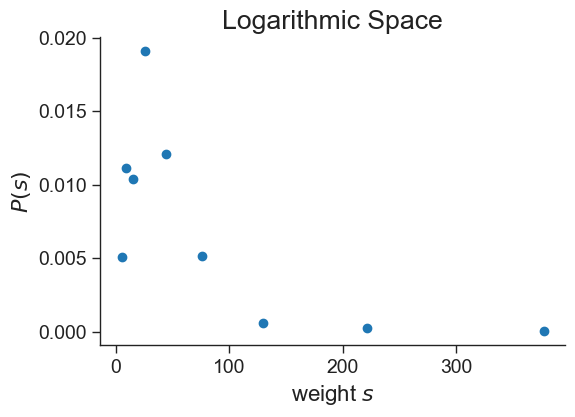

In [27]:
# Probability that a randomly chosen node has strength s
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
strengths = []
for node, strength in dict(G.degree(weight='weight')).items():
    strengths.append(strength)


# print(edge_weights)

kmin = min(strengths)
kmax = max(strengths)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(strengths, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"strength $s$", fontsize=16)
plt.ylabel(r"$P(s)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()


bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(strengths, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"weight $s$", fontsize=16)
plt.ylabel(r"$P(s)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")

# Show the plot
plt.show()



__What do we observe? Is this surprising, or expected?__

TODO

## Q2: Binary metrics (30 marks)

In this question, ignore the weights on the edges and treat the network as if it were binary. 

Calculate (a) the average clustering coefficient; and (b) the average shortest path length for the binarized network representing the C. elegans nervous system. (4 marks)

In [11]:
# First, read in graph again, disregard weights

# Create our graph, load it in
UW_G = nx.Graph()

# Load it in the python way
f = open("celegans_wu", 'r')

for line in f:
    # print(line)
    split = line.strip().split(' ', 2)
    # print(split)
    node1 = int(split[0])
    node2 = int(split[1])
   
    UW_G.add_edge(node1, node2)
    
# Might be possible to remove weights from G, instead of reading in, but this seems easier

In [12]:
# A) average clustering coeffecient
print(f"Average Clustering Coefficient: {nx.average_clustering(UW_G)}")

# B) average shortest path length 
print(f"Average Shortest Path Length: {nx.average_shortest_path_length(UW_G)}")

Average Clustering Coefficient: 0.3371339990890197
Average Shortest Path Length: 2.435625692993992


Can we say anything about these numbers? Not really - we need a reference system to compare to. Generate an ensemble of 100 comparable random ER graphs, and calculate both the average clustering and average shortest path length. (4 marks)

In [13]:
# More pythonic way
#TODO: NOT SURE IF THIS IS THE BEST WAY TO DO THIS
import itertools as it
import random
def erdos_renyi(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(edge for edge in it.combinations(nodes, 2) if np.random.uniform() < p)
    return G

graphs = []

for i in range(100):
    # graph = erdos_renyi(random.randrange(250, 300), 1e-2)
    # Can use networkx directly
    
    # What is the best p value? Also, seeded for replicability
    graph = nx.erdos_renyi_graph(278, 0.5, seed=123, directed=False)
    
    graphs.append(graph)
    
avg_clustering_coefficients = []
avg_shortest_path_lengths = []

for g in graphs:
    avg_clustering_coefficients.append(nx.average_clustering(g))
    # NONE OF THE GRAPHS GENERATED ARE CONNECTED??
    if (nx.is_connected(g)):
        avg_shortest_path_lengths.append(nx.average_shortest_path_length(g))

# avg_clustering_coefficients
print(avg_clustering_coefficients)
print(avg_shortest_path_lengths)    

# print avgs of lists
# print(f"Average clustering of 100 random graphs: {sum(avg_clustering_coefficients) / len(avg_clustering_coefficients)}")
# print(f"Average shortest path of 100 random graphs: {sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)}")
print(f"Average clustering of 100 random graphs: {np.mean(avg_clustering_coefficients)}")
print(f"Average shortest path of 100 random graphs: {np.mean(avg_shortest_path_lengths)}")


[0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479, 0.4985572619213479,

Now, generate an ensemble of 100 random graphs through degree-preserving (DP) double edge swaps, and calculate both the average clustering and average shortest path length. (6 marks)

Show your results as box plots - one for average clustering, and one for the average path length. Include the ER graphs, the DP graphs, and points for the real values observed in the C. elegans network. (10 marks)

What can you say about clustering and path length in C. elegans now? (6 marks)

## Q3: Weighted metrics (45 marks)

Return to your original weighted graph. Both the average clustering coefficient and the average shortest path length generalize to weighted networks - calculate the average weighted clustering coefficient for the C. elegans network. (2 marks)

Hint: Networkx can use the weights if you instruct it to https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html


As you move to consider the weighted average shortest path length, think about what you want the edge weights to mean - a greater weight means a greater number of synapses, and therefore a stronger connection. You will need to choose an appropriate method to invert the edge weights. Implement such an inversion, and then calculate the weighted average shortest path length. (10 marks)

What do these numbers mean? Just as with the binary metrics, you now need to compare to a reference system. Again use two null models. For the first, implement a degree preserving double edge swap randomization (don't worry but do note that this does not preserve strength). For the second, fix the edges where they are and randomly shuffle the weights. (15 marks)

Create similar boxplots as in Q2, one for the weighted average clustering coefficient and one for the weighted average shortest path. (10 marks)

Interpret your findings - what can you say about weighted clustering and weighted average shortest path in C. elegans? (8 marks)